In [15]:
import pandas as pd
import ast

# Get data from users
restaurants = pd.read_csv('../../yelp_academic/csv_data/yelp_academic_dataset_business.csv')

# Filter only restaurants and create a column for the price range
restaurants = restaurants.dropna(subset=['attributes'])
restaurants = restaurants[restaurants['attributes'].str.contains('RestaurantsPriceRange2', na=False)]
restaurants = restaurants[restaurants['categories'].str.contains('Restaurants', na=False)]
restaurants['price'] = restaurants['attributes'].apply(lambda x: ast.literal_eval(x).get('RestaurantsPriceRange2'))
restaurants = restaurants.dropna(subset=['price'])
restaurants = restaurants[restaurants['price'] != 'None']
restaurants['price'] = restaurants['price'].astype('int')
restaurants = restaurants.reset_index(drop=True)

restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,price
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",1
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN,1
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",1
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1


In [22]:
from sklearn.decomposition import PCA
import numpy as np

# Get the features we are interested in
features = ['stars', 'price', 'review_count']
inputs = restaurants[features].copy()
for feature in features[2:]:
    inputs[feature] = np.log(inputs[feature] + 1)

# Apply PCA to get user factors
factors = PCA(n_components=2, random_state=0).fit_transform(inputs)
factors[:5]

array([[ 0.60059881, -0.30337361],
       [-2.30048708,  0.8131527 ],
       [-1.01276956,  0.19940422],
       [-2.03253194,  1.43074185],
       [-0.81987819,  0.79141421]])

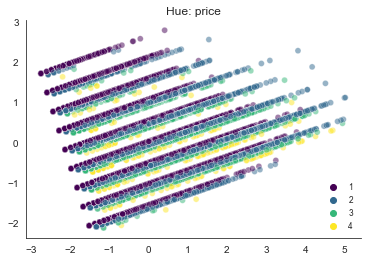

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize if the factors describe the inputs
hue = 'price'
viridis = sns.color_palette('viridis', as_cmap=True)
sns.set_style('white')
sns.scatterplot(x=factors.T[0], y=factors.T[1], hue=inputs[hue], palette=viridis, alpha=0.5)
plt.legend(loc=4, frameon=False, fontsize='small'); plt.title(f'Hue: {hue}')
sns.despine(); plt.savefig('figures/user_vectors.png', dpi=200)
plt.show()